## Kaggle - Predict Future Sales
### Benchmark Model - using Facebook Prophet Forecasting tool
### and Moving Average

In [56]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt
from fbprophet import Prophet

stdout = sys.stdout

#sales_train = pd.read_csv("/Users/djmore/Udacity/machine-learning/projects/capstone/sales_train.csv", sep =',', skiprows=[1,220000], nrows = 100000)

sales_train     = pd.read_csv("/Users/djmore/Udacity/machine-learning/projects/capstone/sales_train.csv", sep =',')
items           = pd.read_csv('/Users/djmore/Udacity/machine-learning/projects/capstone/items.csv')
item_categories = pd.read_csv('/Users/djmore/Udacity/machine-learning/projects/capstone/item_categories.csv')
shops           = pd.read_csv('/Users/djmore/Udacity/machine-learning/projects/capstone/shops.csv')
test            = pd.read_csv('/Users/djmore/Udacity/machine-learning/projects/capstone/test.csv')

sales_data           = pd.DataFrame(sales_train)
items_data           = pd.DataFrame(items)
item_categories_data = pd.DataFrame(item_categories)
shops_data           = pd.DataFrame(shops)
kaggle_data          = pd.DataFrame(test)

In [57]:
# Convert date field to datetime field in pandas
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Extract out date features and add it to sales_data DataFrame
sales_data['year'] = sales_data['date'].dt.year
sales_data['month'] = sales_data['date'].dt.month
sales_data['day'] = sales_data['date'].dt.day

sales_data['dayofyear'] = sales_data['date'].dt.dayofyear
sales_data['weekofyear'] = sales_data['date'].dt.weekofyear
sales_data['dayofweek'] = sales_data['date'].dt.dayofweek
sales_data['quarter'] = sales_data['date'].dt.quarter

# Sort data in ascending order of time series - year, month,and day
sales_data.sort_values(['date_block_num','date'], ascending=[True,True],inplace=True)

## Predict next month sales using
### FB Prophet forecasting tool

In [58]:
# Let's prepare the date column with 33 months of date sequence.
date_sequence=['01/01/2013','01/02/2013',
     '01/03/2013',
     '01/04/2013',
     '01/05/2013',
     '01/06/2013',
     '01/07/2013',
     '01/08/2013',
     '01/09/2013',
     '01/10/2013',
     '01/11/2013',
     '01/12/2013',
     '01/01/2014',
     '01/02/2014',
     '01/03/2014',
     '01/04/2014',
     '01/05/2014',
     '01/06/2014',
     '01/07/2014',
     '01/08/2014',
     '01/09/2014',
     '01/10/2014',
     '01/11/2014',
     '01/12/2014',
     '01/01/2015',
     '01/02/2015',
     '01/03/2015',
     '01/04/2015',
     '01/05/2015',
     '01/06/2015',
     '01/07/2015',
     '01/08/2015',
     '01/09/2015',
     '01/10/2015']

## FB prophet reqiures a pandas dataframe with 
## date column named as DS and the value column as Y

In [59]:
date_sequence=pd.DataFrame(date_sequence,columns=['ds'])
ts1=pd.DataFrame(sales_data.groupby(["date_block_num"])["item_cnt_day"].sum().reset_index())

ts1 = pd.concat([date_sequence,ts1], axis=1)
ts  = ts1.rename(columns={'item_cnt_day':'y'})
ts.drop(['date_block_num'], 1, inplace=True)
ts['ds'] = pd.to_datetime(ts['ds'],format='%d/%m/%Y')
display(ts)

,ds,y
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0
5,2013-06-01,125381.0
6,2013-07-01,116966.0
7,2013-08-01,125291.0
8,2013-09-01,133332.0
9,2013-10-01,127541.0


In [60]:
model = Prophet(yearly_seasonality=True)  

# We will use first 28 values for training and last 6 for predict and calculating accuracy.
model.fit(ts[:-6]) 

# predict for next six months in the furure 
future = model.make_future_dataframe(periods = 6, freq = 'MS')  

# now lets make the forecasts
forecast = model.predict(future)
print('')
print('FB Prophet predicted forecast for next 6 months')
prophet_y = pd.DataFrame(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
#display(prophet_y)

final_actual_prediction = pd.concat([ts,prophet_y],axis=1)
display(final_actual_prediction[28:34])

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 21.0.
/Users/djmore/anaconda3/envs/py3/lib/python3.6/site-packages/fbprophet/forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)



FB Prophet predicted forecast for next 6 months


,ds,y,ds,yhat,yhat_lower,yhat_upper
28,2015-05-01,72295.0,2015-05-01,91707.835518,89595.437808,93790.521202
29,2015-06-01,64114.0,2015-06-01,78268.727692,76120.183013,80282.137523
30,2015-07-01,63187.0,2015-07-01,74215.509333,72056.569330,76343.085919
31,2015-08-01,66079.0,2015-08-01,86823.047763,84652.968484,88945.263110
32,2015-09-01,72843.0,2015-09-01,72372.460973,70193.783424,74492.770835
33,2015-10-01,71056.0,2015-10-01,90016.653439,87659.851197,92123.859702


In [78]:
## Calculate RMSE using actual y and predicted yhat

error = 0
for i in (final_actual_prediction[28:]['y']-final_actual_prediction[28:]['yhat']):
    error = error + (i*i)

RMSE = round(np.sqrt(error/6))

In [79]:
print('Prophet RMSE = {}'.format(round(RMSE)))

Prophet RMSE = 15753.0


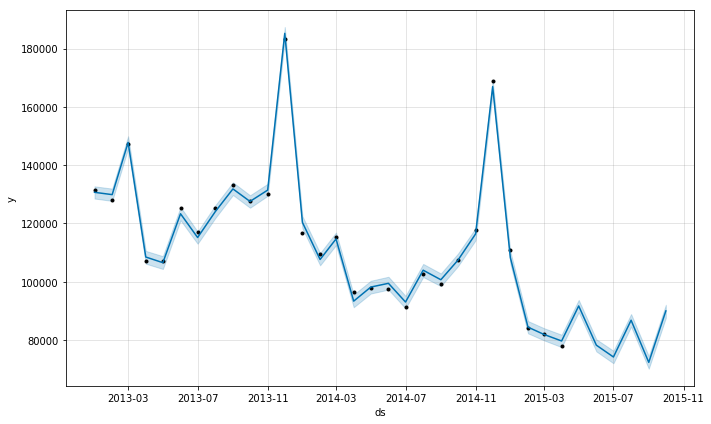

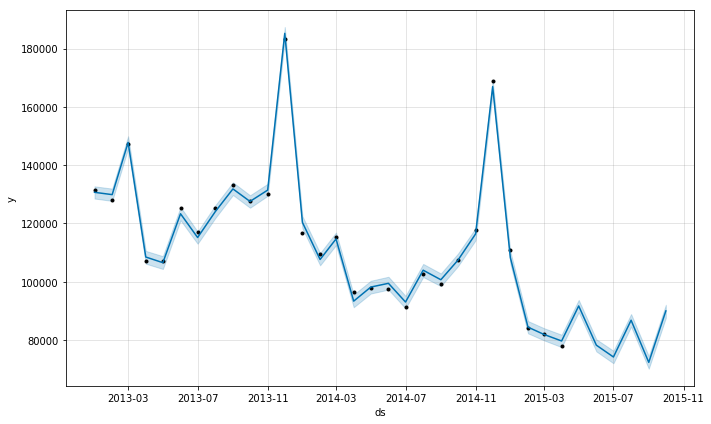

In [64]:
model.plot(forecast)

### Let's calculate Moving Average using a window of 3 months

In [80]:
## Monthly Sales
## Moving Average - using a window of 2 months

display(ts['y'].rolling(window=3).mean())
mv_y = ts['y'].rolling(window=3).mean().reset_index()

0               NaN
1               NaN
2     135570.333333
3     127474.000000
4     120434.000000
5     113180.333333
6     116439.000000
7     122546.000000
8     125196.333333
9     128721.333333
10    130294.000000
11    146964.000000
12    143416.666667
13    136642.666667
14    113961.000000
15    107180.000000
16    103214.333333
17     97258.333333
18     95499.666667
19     97143.333333
20     97736.333333
21    103117.000000
22    108158.333333
23    131340.666667
24    132523.666667
25    121308.000000
26     92394.333333
27     81346.333333
28     77378.666667
29     71412.000000
30     66532.000000
31     64460.000000
32     67369.666667
33     69992.666667
Name: y, dtype: float64

In [81]:
Moving_Average = ts['y'].rolling(window=3).mean().tail(2).sum()/2
print('Predicted Item Sales for 35th month based on 2 month moving average {}'.format(round(Moving_Average)))

Predicted Item Sales for 35th month based on 2 month moving average 68681.0


In [89]:
## Calculate RMSE using actual y and predicted moving average for last 6 months.

error = 0
for i in (mv_y[28:34]['y']-ts[28:34]['y']):
    error = error + (i*i)

MAE = round(np.sqrt(error/6))

In [90]:
print('Moving Average MAE = {}'.format(round(RMSE)))

Moving Average MAE = 4546.0
